In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

In [4]:
# Gerar uma série de ruído branco com média 0 e desvio padrão 1
ruido_branco = np.random.normal(0, 1, 1280)


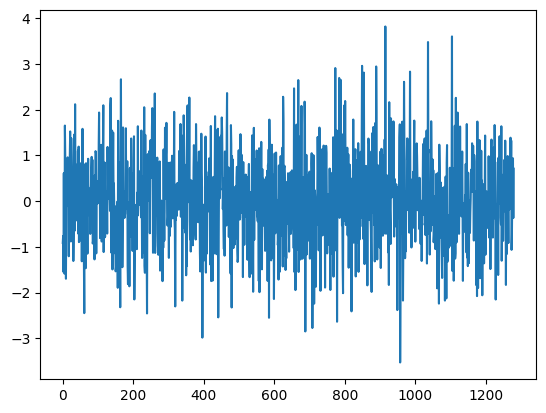

In [5]:
plt.plot(ruido_branco)
plt.show()

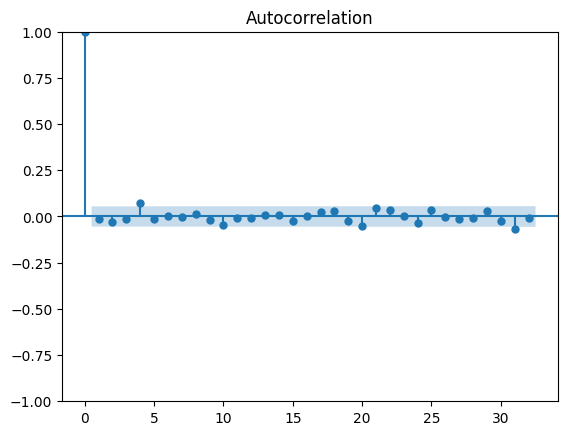

In [6]:
sm.graphics.tsa.plot_acf(ruido_branco)
plt.show()


In [7]:
# Realizar o teste de Ljung-Box para autocorrelação
ljung_box_result = acorr_ljungbox(ruido_branco, lags=[10], return_df=True)
print(ljung_box_result)


      lb_stat  lb_pvalue
10  11.583225   0.313917


In [2]:
data = pd.read_csv('/home/darkcover/Documentos/Out/dados/odds_200k_1.csv')

array1, array2, array3 = [], [], []
for i in range(0, len(data)):
    if data['Odd'][i] >= 2:
        array1.append(1)
    else:
        array1.append(0)

for j in range(60, 1280):
    array = array1[j - 60: j]
    media = sum(array)/60 - 0.5
    array2.append(media)

for k in range(60,1280):
    media = sum(array1[0:k]) / len(array1[0:k]) - 0.5
    array3.append(media)



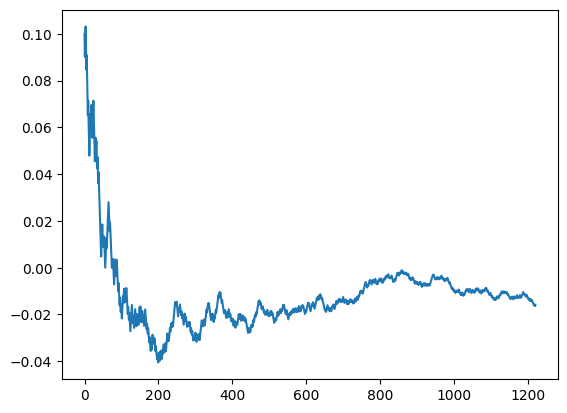

In [3]:
plt.plot(array3)

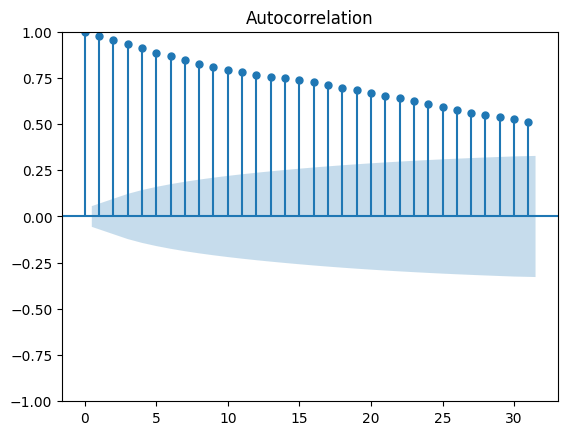

In [10]:
sm.graphics.tsa.plot_acf(np.array(array3))
plt.show()

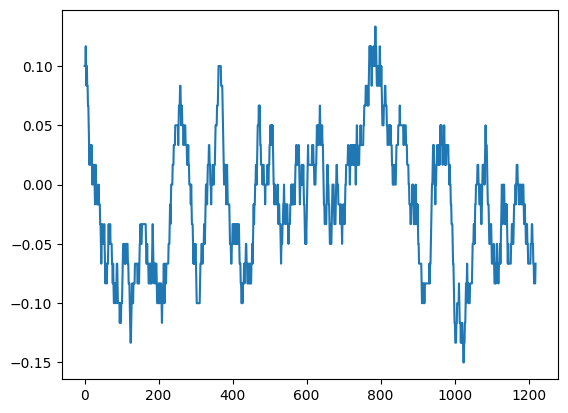

In [4]:
plt.plot(array2)

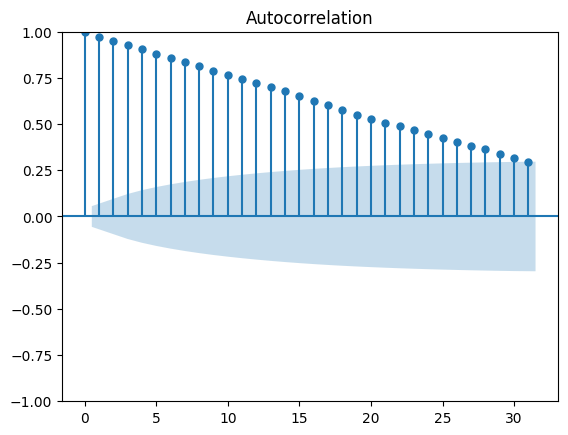

In [5]:
sm.graphics.tsa.plot_acf(np.array(array2))
plt.show()

In [6]:
# Realizar o teste de Ljung-Box para autocorrelação
ljung_box_result = acorr_ljungbox(array2, lags=range(60,120), return_df=True)
print(ljung_box_result)


          lb_stat  lb_pvalue
60   17258.192397        0.0
61   17266.552189        0.0
62   17272.654486        0.0
63   17276.979578        0.0
64   17279.617582        0.0
65   17281.095918        0.0
66   17281.855783        0.0
67   17282.133870        0.0
68   17282.174848        0.0
69   17282.221264        0.0
70   17282.526297        0.0
71   17283.388777        0.0
72   17285.020283        0.0
73   17287.547238        0.0
74   17291.091216        0.0
75   17296.431336        0.0
76   17303.675919        0.0
77   17313.984608        0.0
78   17327.733539        0.0
79   17344.809364        0.0
80   17365.342923        0.0
81   17389.880508        0.0
82   17418.268552        0.0
83   17450.792484        0.0
84   17488.600381        0.0
85   17533.070316        0.0
86   17584.791363        0.0
87   17641.855838        0.0
88   17705.115740        0.0
89   17775.846112        0.0
90   17852.668176        0.0
91   17936.201749        0.0
92   18027.493572        0.0
93   18125.933

In [7]:
from statsmodels.tsa.ar_model import AutoReg

# Ajustar o modelo AR ao array2
model_ar = AutoReg(array2, lags=60)  # Ajuste o lag conforme sua análise de ACF
model_ar_fit = model_ar.fit()

# Exibir sumário do modelo AR
print(model_ar_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1220
Model:                    AutoReg(60)   Log Likelihood                3558.778
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Sun, 13 Oct 2024   AIC                          -6993.556
Time:                        20:03:22   BIC                          -6680.073
Sample:                            60   HQIC                         -6875.272
                                 1220                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -1.728      0.084      -0.001    8.41e-05
y.L1           0.9328      0.029     31.812      0.000       0.875       0.990
y.L2           0.0283      0.040      0.706      0.4

In [9]:
# Previsão de 0 passos à frente
previsao = model_ar_fit.predict(start=len(array2), end=len(array2)+ 640)

print("Previsão das médias futuras (AR):", previsao)

Previsão das médias futuras (AR): [-0.0602307  -0.06355093 -0.06375526 -0.05837954 -0.05948014 -0.0600288
 -0.05658683 -0.05583314 -0.05822094 -0.05709541 -0.05569757 -0.05485859
 -0.0523286  -0.05161318 -0.04541339 -0.04232935 -0.04068978 -0.03860122
 -0.04400248 -0.04445518 -0.04128352 -0.04054832 -0.04447759 -0.04171924
 -0.04088192 -0.03819706 -0.03554492 -0.03462488 -0.03222155 -0.03154688
 -0.03167294 -0.02833924 -0.03212698 -0.02974319 -0.02761224 -0.02941296
 -0.0298343  -0.02855489 -0.02898059 -0.02670216 -0.02362663 -0.02220037
 -0.02141486 -0.02083179 -0.01939296 -0.01669577 -0.0206265  -0.01909168
 -0.01758674 -0.01714515 -0.01676151 -0.0161129  -0.01745837 -0.01722627
 -0.01646749 -0.01512638 -0.01453448 -0.01408873 -0.01193896 -0.01210502
 -0.01259404 -0.01176442 -0.01122094 -0.01182111 -0.01149461 -0.00951926
 -0.01002079 -0.00960661 -0.00900781 -0.00896156 -0.00813689 -0.00786004
 -0.00740387 -0.00775678 -0.00762255 -0.00716686 -0.00700633 -0.00813197
 -0.00772897 -0.00

In [12]:
array_previsao = np.array(previsao)
for i in range(0, len(array_previsao)):
    print(round(array_previsao[i],3))
    

-0.06
-0.064
-0.064
-0.058
-0.059
-0.06
-0.057
-0.056
-0.058
-0.057
-0.056
-0.055
-0.052
-0.052
-0.045
-0.042
-0.041
-0.039
-0.044
-0.044
-0.041
-0.041
-0.044
-0.042
-0.041
-0.038
-0.036
-0.035
-0.032
-0.032
-0.032
-0.028
-0.032
-0.03
-0.028
-0.029
-0.03
-0.029
-0.029
-0.027
-0.024
-0.022
-0.021
-0.021
-0.019
-0.017
-0.021
-0.019
-0.018
-0.017
-0.017
-0.016
-0.017
-0.017
-0.016
-0.015
-0.015
-0.014
-0.012
-0.012
-0.013
-0.012
-0.011
-0.012
-0.011
-0.01
-0.01
-0.01
-0.009
-0.009
-0.008
-0.008
-0.007
-0.008
-0.008
-0.007
-0.007
-0.008
-0.008
-0.007
-0.008
-0.008
-0.007
-0.008
-0.007
-0.007
-0.007
-0.007
-0.008
-0.007
-0.007
-0.008
-0.008
-0.008
-0.008
-0.008
-0.008
-0.009
-0.009
-0.008
-0.008
-0.009
-0.009
-0.009
-0.009
-0.01
-0.01
-0.01
-0.011
-0.01
-0.011
-0.011
-0.011
-0.011
-0.012
-0.012
-0.012
-0.012
-0.012
-0.013
-0.013
-0.013
-0.013
-0.013
-0.013
-0.014
-0.014
-0.014
-0.014
-0.014
-0.014
-0.015
-0.015
-0.015
-0.015
-0.015
-0.016
-0.016
-0.016
-0.016
-0.016
-0.016
-0.016
-0.016
-0.

In [ ]:

junto = np.concat([array2, array_previsao])

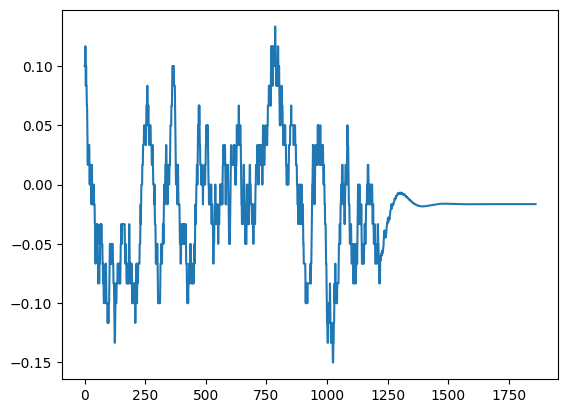

In [27]:
plt.plot(junto)

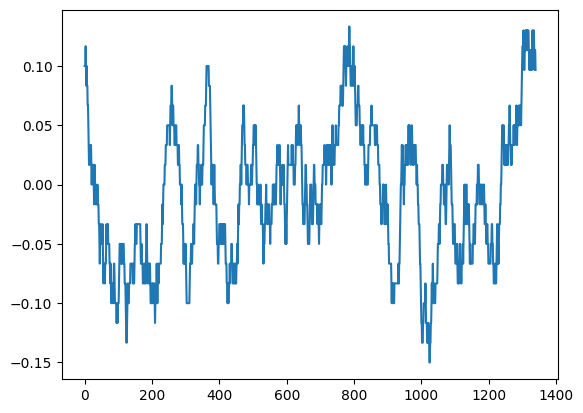

In [32]:
# Função para gerar oscilação controlada
def gerar_oscillacao(valor_inicial, incremento, tamanho, limite_inferior=0.28 - 0.5, limite_superior=0.63 - 0.5):
    osc_final = [valor_inicial]
    for i in range(1, tamanho):
        probabilidade = np.random.rand()
        if probabilidade < 1/3:
            proximo_valor = osc_final[-1] + incremento
        elif probabilidade < 2/3:
            proximo_valor = osc_final[-1]
        else:
            proximo_valor = osc_final[-1] - incremento
        proximo_valor = np.clip(proximo_valor, limite_inferior, limite_superior)
        osc_final.append(proximo_valor)
        
    return osc_final


array_osc = gerar_oscillacao(valor_inicial=array2[-1], incremento=1/60, tamanho=120)

junto2 = np.concatenate([array2,array_osc])

plt.plot(junto2)

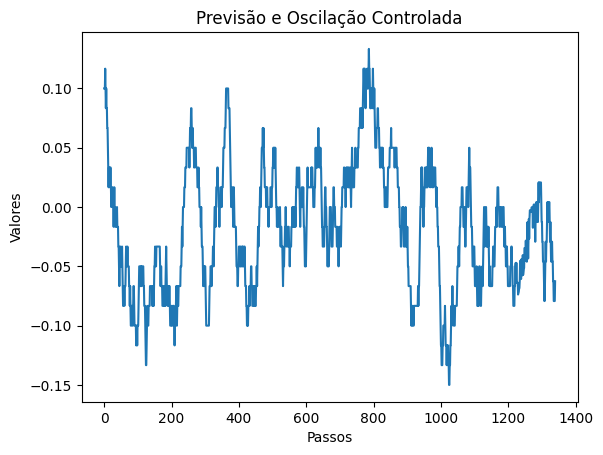

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Função para gerar oscilação controlada, agora com referência ao modelo AR
def gerar_oscillacao(valor_inicial, incremento, tamanho, previsao_ar, limite_inferior=0.28 - 0.5, limite_superior=0.63 - 0.5):
    osc_final = [valor_inicial]
    
    for i in range(1, tamanho):
        probabilidade = np.random.rand()
        
        # Ajuste para seguir a previsão AR
        if i < len(previsao_ar):
            referencia_ar = previsao_ar[i]
        else:
            referencia_ar = osc_final[-1]  # Continue oscilando baseado no último valor gerado
        
        if probabilidade < 1/3:
            proximo_valor = osc_final[-1] + incremento
        elif probabilidade < 2/3:
            proximo_valor = osc_final[-1]
        else:
            proximo_valor = osc_final[-1] - incremento
        
        # Aplicar os limites e o controle da previsão AR
        proximo_valor = np.clip(proximo_valor, max(limite_inferior, referencia_ar - incremento), 
                                min(limite_superior, referencia_ar + incremento))
        
        osc_final.append(proximo_valor)
        
    return osc_final

# Supondo que você já tenha um modelo AR treinado e gerado previsões de 60 passos
previsao_ar = model_ar_fit.predict(start=len(array2), end=len(array2) + 60)

# Gerar oscilações baseadas na previsão AR
array_osc = gerar_oscillacao(valor_inicial=array2[-1], incremento=1/60, tamanho=120, previsao_ar=previsao_ar)

# Concatenar a previsão e a oscilação
junto2 = np.concatenate([array2, array_osc])

# Plotar o gráfico resultante
plt.plot(junto2)
plt.title('Previsão e Oscilação Controlada')
plt.xlabel('Passos')
plt.ylabel('Valores')
plt.show()


In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar o modelo ARIMA ao array2
# (p, d, q) são os parâmetros do ARIMA:
# p: lags de autoregressão
# d: número de diferenciações necessárias para estacionariedade
# q: lags de médias móveis
model_arima = ARIMA(array2, order=(60, 0, 0))  # O "d" é 0 porque não estamos diferenciando aqui
model_arima_fit = model_arima.fit()

# Exibir sumário do modelo ARIMA
print(model_arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1220
Model:                ARIMA(60, 0, 0)   Log Likelihood                3735.235
Date:                Sun, 13 Oct 2024   AIC                          -7346.469
Time:                        18:12:09   BIC                          -7029.860
Sample:                             0   HQIC                         -7227.302
                               - 1220                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0148      0.008     -1.841      0.066      -0.031       0.001
ar.L1          0.9263      0.029     32.151      0.000       0.870       0.983
ar.L2          0.0297      0.039      0.766      0.4

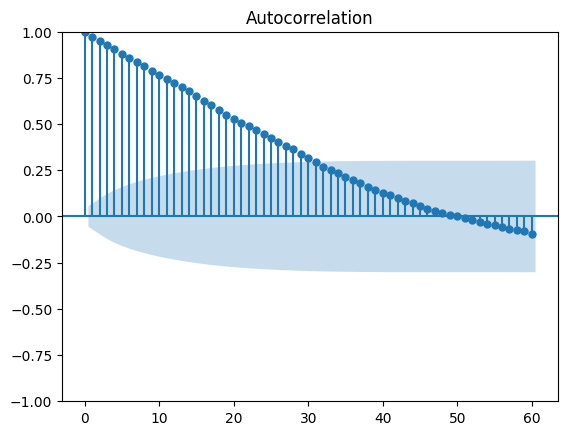

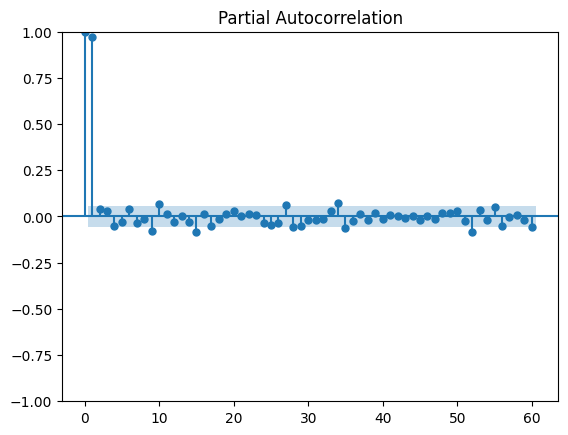

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plotar o gráfico ACF (Autocorrelação)
sm.graphics.tsa.plot_acf(array2, lags=60)  # Ajuste o número de lags conforme necessário
plt.show()

# Plotar o gráfico PACF (Autocorrelação Parcial)
sm.graphics.tsa.plot_pacf(array2, lags=60)
plt.show()


In [17]:
# Calcular a primeira diferença
array2_diff = np.diff(array2)

# Agora, você pode aplicar o mesmo modelo ARIMA na série diferenciada
# Ajustar o modelo ARIMA ao array2 diferenciado
model_arima_diff = ARIMA(array2_diff, order=(60, 0, 0))  # "d" ainda 0 após a diferenciação
model_arima_diff_fit = model_arima_diff.fit()

# Exibir sumário do modelo ARIMA diferenciado
print(model_arima_diff_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1219
Model:                ARIMA(60, 0, 0)   Log Likelihood                3896.610
Date:                Sun, 13 Oct 2024   AIC                          -7669.220
Time:                        18:23:45   BIC                          -7352.661
Sample:                             0   HQIC                         -7550.067
                               - 1219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.677e-05      0.000     -0.492      0.623      -0.000       0.000
ar.L1         -0.0335      0.025     -1.355      0.175      -0.082       0.015
ar.L2         -0.0227      0.024     -0.939      0.3

In [18]:
from statsmodels.tsa.stattools import adfuller

# Realizar o teste de Dickey-Fuller na série array2
adf_result = adfuller(array2)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

# Se o p-value for menor que 0.05, rejeitamos a hipótese nula e consideramos a série estacionária.


ADF Statistic: -4.260079
p-value: 0.000520


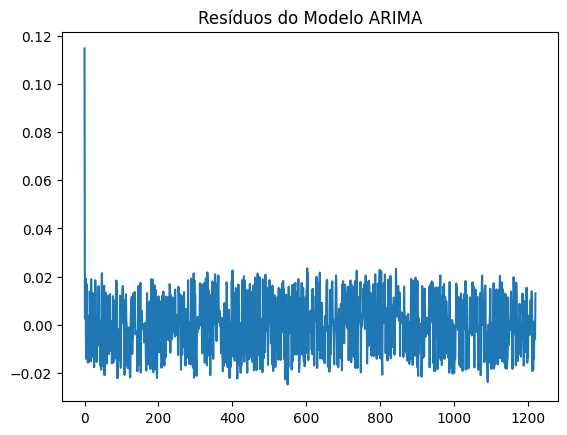

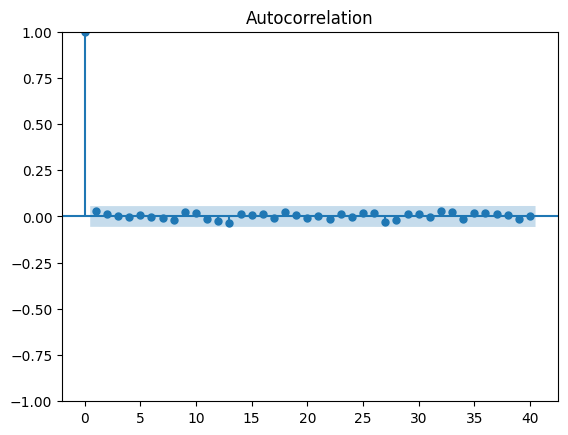

In [19]:
# Obter os resíduos do modelo ARIMA ajustado
residuals = model_arima_fit.resid

# Plotar os resíduos
plt.plot(residuals)
plt.title('Resíduos do Modelo ARIMA')
plt.show()

# Testar autocorrelação nos resíduos (devem ser ruído branco)
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()


In [29]:
# Ajustar o modelo AR apenas com lags significativos
significant_lags = [1, 9, 26, 27, 34]
model_ar1 = AutoReg(array2, lags=significant_lags)
model_ar_fit1 = model_ar.fit()
print(model_ar_fit1.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1220
Model:                    AutoReg(60)   Log Likelihood                3558.778
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Sun, 13 Oct 2024   AIC                          -6993.556
Time:                        18:56:07   BIC                          -6680.073
Sample:                            60   HQIC                         -6875.272
                                 1220                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -1.728      0.084      -0.001    8.41e-05
y.L1           0.9328      0.029     31.812      0.000       0.875       0.990
y.L2           0.0283      0.040      0.706      0.4